In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"]=(15,5)
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
columns =['State','Account_Len','Area','Ph_No.','Int_Plan','Vmail_Plan','messgs',
            'tot_day_mins','tot_day_calls','tot_day_chrgs','tot_evening_mins',
            'tot_evening_calls','tot_evening_chrgs','tot_ngt_mins','tot_ngt_calls',
            'tot_ngt_chrgs','tot_int_mins','tot_int_calls','tot_int_chrgs',
'cust_calls_made','churn_status']

df = pd.read_csv("F:/churn.txt",names=columns)


In [3]:
data = df[1:]

In [4]:
data.head()

,State,Account_Len,Area,Ph_No.,Int_Plan,Vmail_Plan,messgs,tot_day_mins,tot_day_calls,tot_day_chrgs,...,tot_evening_calls,tot_evening_chrgs,tot_ngt_mins,tot_ngt_calls,tot_ngt_chrgs,tot_int_mins,tot_int_calls,tot_int_chrgs,cust_calls_made,churn_status
1,KS,128,415,382-4657,no,yes,25,265.100000,110,45.070000,...,99,16.780000,244.700000,91,11.010000,10.000000,3,2.700000,1,False.
2,OH,107,415,371-7191,no,yes,26,161.600000,123,27.470000,...,103,16.620000,254.400000,103,11.450000,13.700000,3,3.700000,1,False.
3,NJ,137,415,358-1921,no,no,0,243.400000,114,41.380000,...,110,10.300000,162.600000,104,7.320000,12.200000,5,3.290000,0,False.
4,OH,84,408,375-9999,yes,no,0,299.400000,71,50.900000,...,88,5.260000,196.900000,89,8.860000,6.600000,7,1.780000,2,False.
5,OK,75,415,330-6626,yes,no,0,166.700000,113,28.340000,...,122,12.610000,186.900000,121,8.410000,10.100000,3,2.730000,3,False.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 1 to 3333
Data columns (total 21 columns):
State                3333 non-null object
Account_Len          3333 non-null object
Area                 3333 non-null object
Ph_No.               3333 non-null object
Int_Plan             3333 non-null object
Vmail_Plan           3333 non-null object
messgs               3333 non-null object
tot_day_mins         3333 non-null object
tot_day_calls        3333 non-null object
tot_day_chrgs        3333 non-null object
tot_evening_mins     3333 non-null object
tot_evening_calls    3333 non-null object
tot_evening_chrgs    3333 non-null object
tot_ngt_mins         3333 non-null object
tot_ngt_calls        3333 non-null object
tot_ngt_chrgs        3333 non-null object
tot_int_mins         3333 non-null object
tot_int_calls        3333 non-null object
tot_int_chrgs        3333 non-null object
cust_calls_made      3333 non-null object
churn_status         3333 non-null object
dtypes: obj

In [6]:
data.shape

(3333, 21)

In [7]:
# Convesrting Binary object data type variable to integer data type
data["Int_Plan"] = np.where(data.Int_Plan =="yes",1,0).astype(int)
data["Vmail_Plan"] = np.where(data.Vmail_Plan =="yes",1,0).astype(int)
data["churn_status"] = np.where(data.churn_status =="True.",1,0).astype(int)

C:\Users\SUNEEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\SUNEEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\SUNEEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [9]:
data.head()

,State,Account_Len,Area,Ph_No.,Int_Plan,Vmail_Plan,messgs,tot_day_mins,tot_day_calls,tot_day_chrgs,...,tot_evening_calls,tot_evening_chrgs,tot_ngt_mins,tot_ngt_calls,tot_ngt_chrgs,tot_int_mins,tot_int_calls,tot_int_chrgs,cust_calls_made,churn_status
1,KS,128,415,382-4657,0,1,25,265.100000,110,45.070000,...,99,16.780000,244.700000,91,11.010000,10.000000,3,2.700000,1,0
2,OH,107,415,371-7191,0,1,26,161.600000,123,27.470000,...,103,16.620000,254.400000,103,11.450000,13.700000,3,3.700000,1,0
3,NJ,137,415,358-1921,0,0,0,243.400000,114,41.380000,...,110,10.300000,162.600000,104,7.320000,12.200000,5,3.290000,0,0
4,OH,84,408,375-9999,1,0,0,299.400000,71,50.900000,...,88,5.260000,196.900000,89,8.860000,6.600000,7,1.780000,2,0
5,OK,75,415,330-6626,1,0,0,166.700000,113,28.340000,...,122,12.610000,186.900000,121,8.410000,10.100000,3,2.730000,3,0


In [10]:
# unique values  
print(data.Int_Plan.unique())
print(data.Vmail_Plan.unique())
print(data.churn_status.unique())

[0 1]
[1 0]
[0 1]


In [50]:
# data['State'].value_counts().unique()

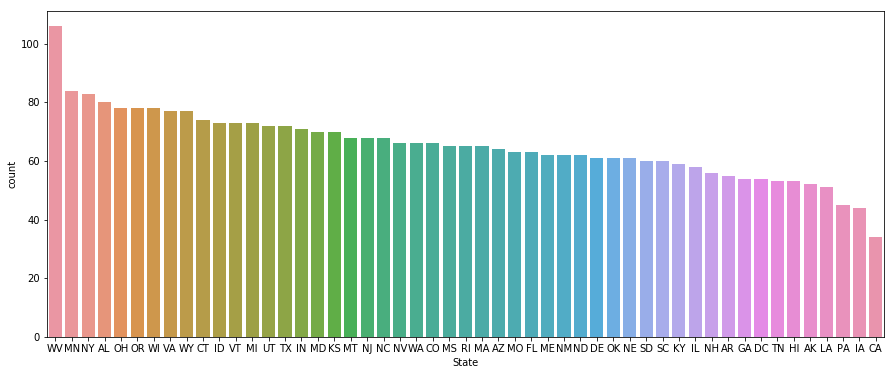

In [11]:
# Plotting Bar Chart of Unique count of State 

plt.rcParams['figure.figsize']=(15,6)

sns.countplot(x="State", data=data, order=data['State'].value_counts().index )


C:\Users\SUNEEL\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


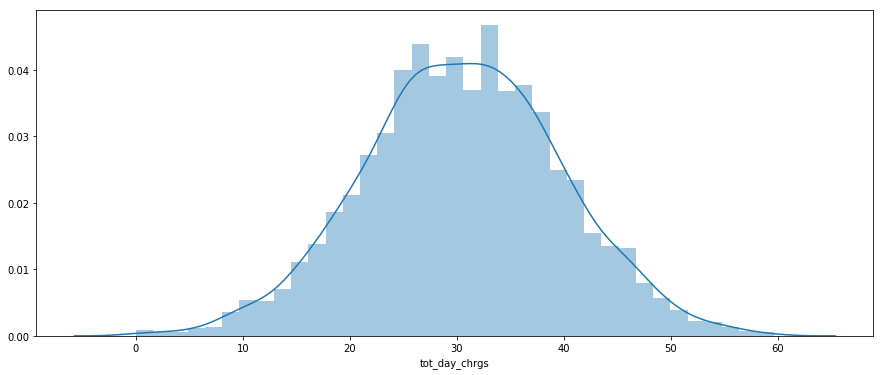

C:\Users\SUNEEL\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


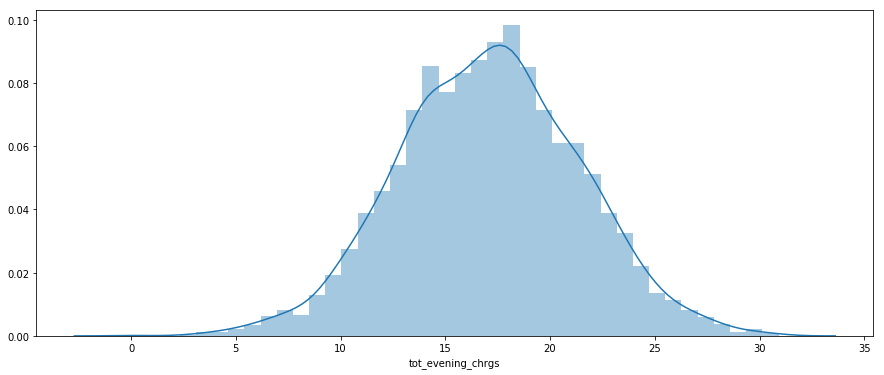

C:\Users\SUNEEL\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


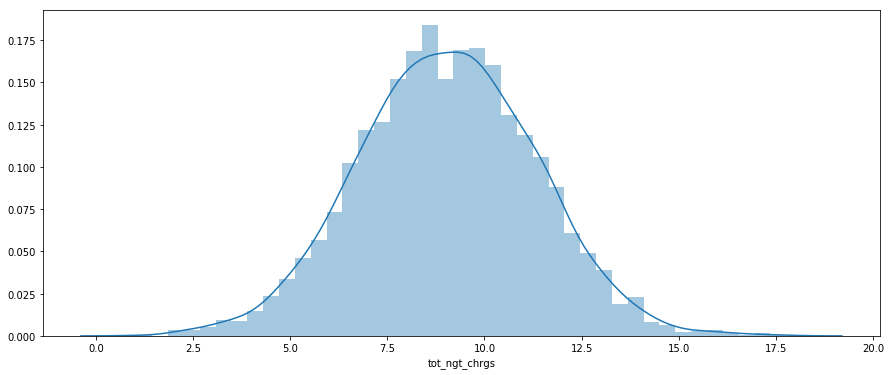

C:\Users\SUNEEL\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


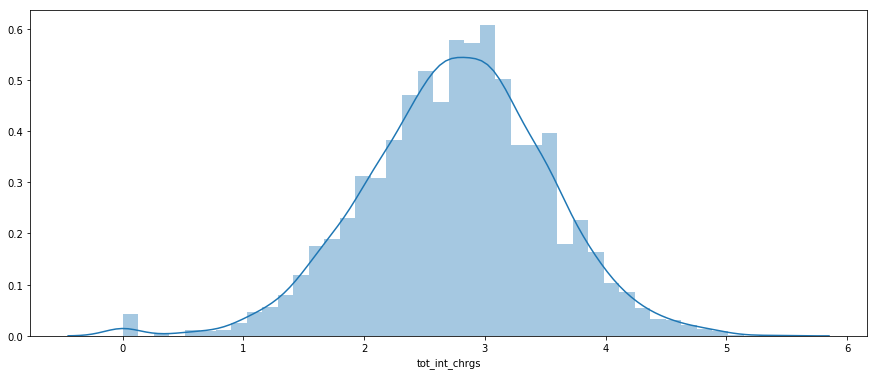

In [12]:
# Checking Distributions of the numerical features

sns.distplot(data.tot_day_chrgs.astype(float))
plt.show()
sns.distplot(data.tot_evening_chrgs.astype(float))
plt.show()
sns.distplot(data.tot_ngt_chrgs.astype(float))
plt.show()
sns.distplot(data.tot_int_chrgs.astype(float))
plt.show()

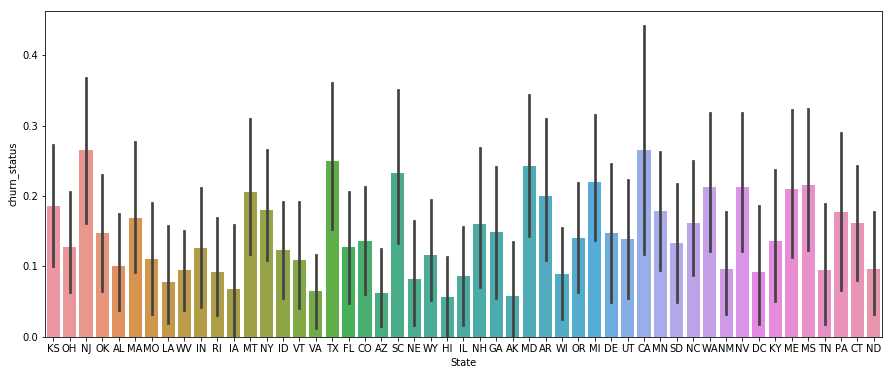

In [17]:
# Plotting Barchart of Statewise Churning status
sns.barplot(x="State",y="churn_status" ,data=data)

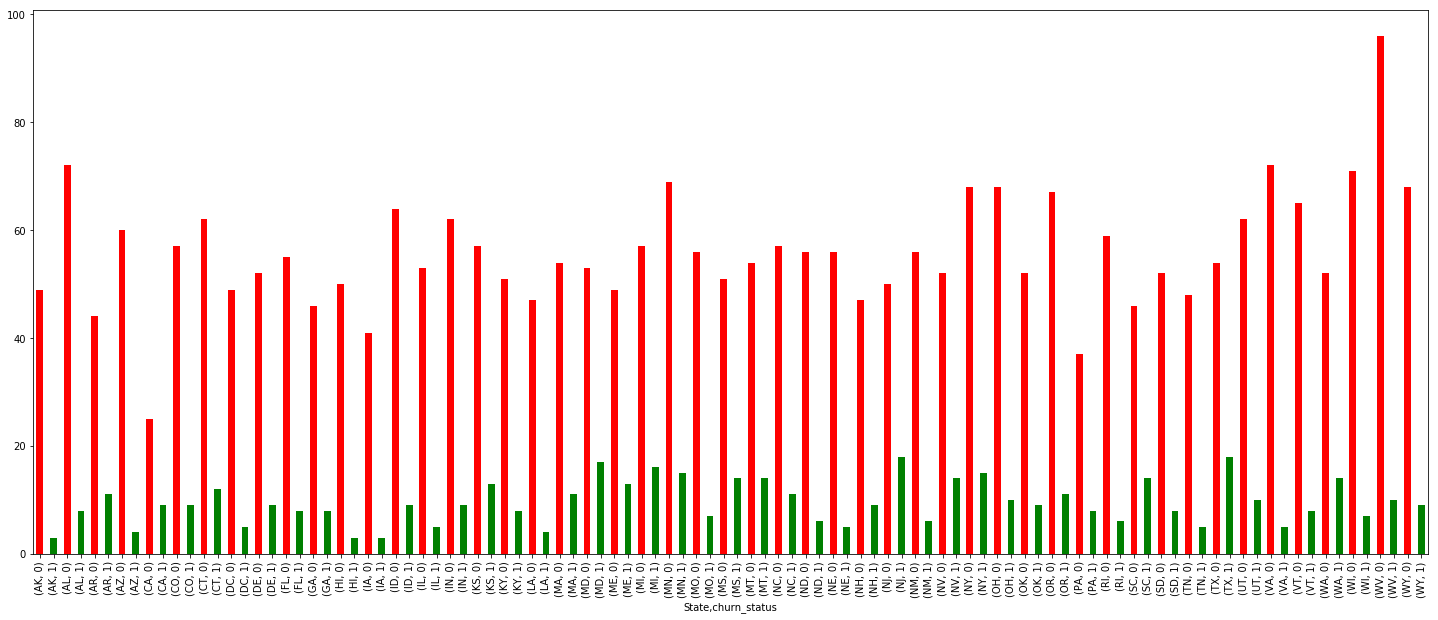

In [23]:
# Count of Churning Status with state wise   

plt.rcParams["figure.figsize"]=(25,10)
var = data.groupby(["State","churn_status"]).churn_status.count()
var.plot(kind="bar",color=["red","green"])


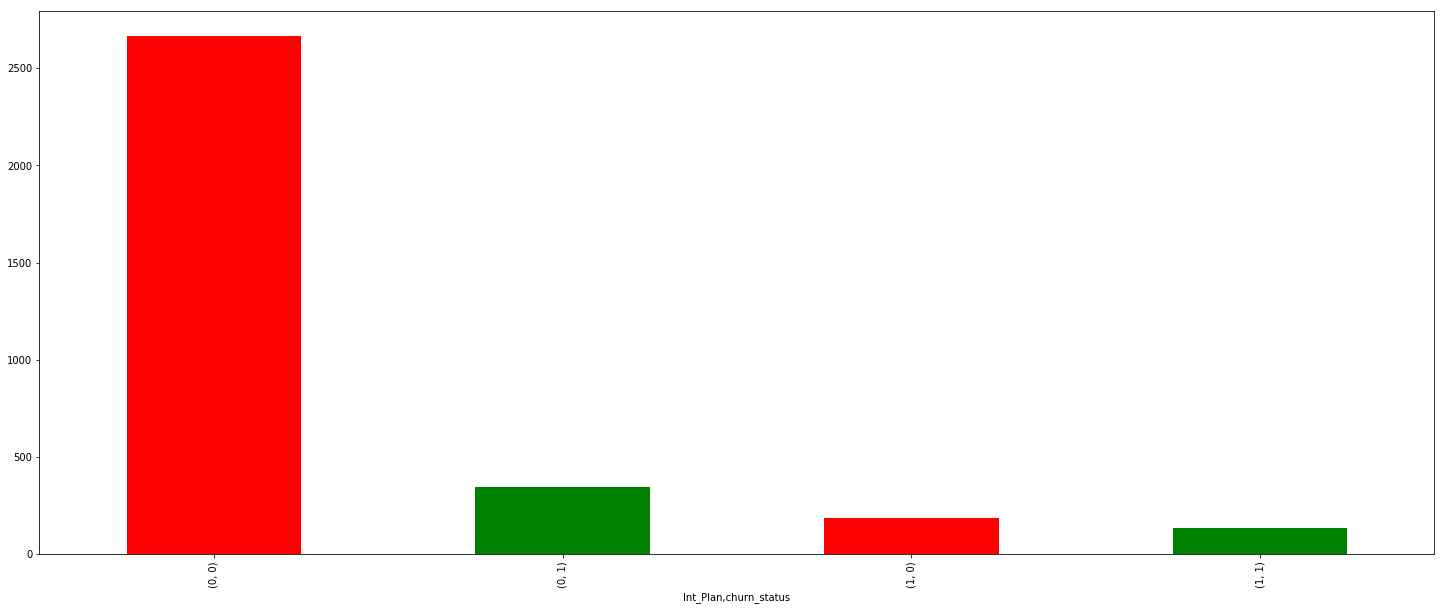

In [25]:
# Bar chart of Count of International plans with Churning Status
Int_Plan = data.groupby(["Int_Plan","churn_status"]).churn_status.count()
Int_Plan.plot(kind="bar",color=["red","green"])

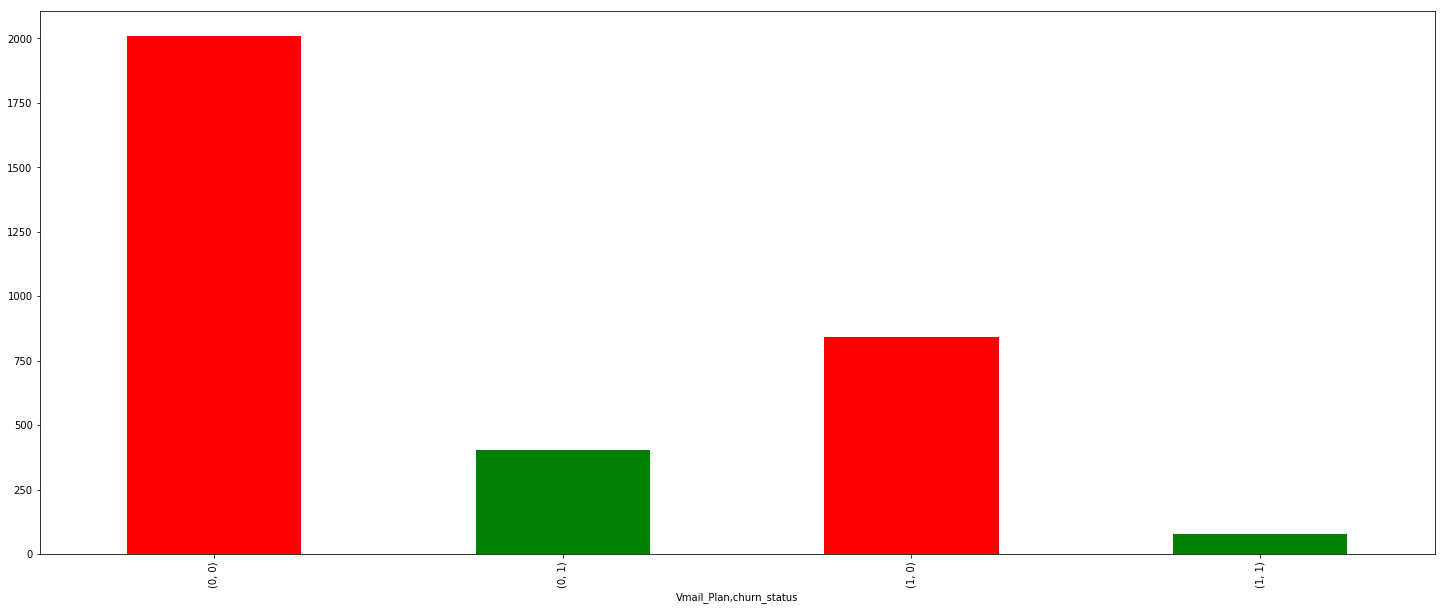

In [26]:
# Count of Vmail_Plans with Churning Status.
Vmail_Plan = data.groupby(["Vmail_Plan","churn_status"]).churn_status.count()
Vmail_Plan.plot(kind="bar",color=["red","green"])

In [51]:
correlations_data = data.corr()['churn_status'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

Vmail_Plan     -0.102148
Int_Plan        0.259852
churn_status    1.000000
Name: churn_status, dtype: float64 

Vmail_Plan     -0.102148
Int_Plan        0.259852
churn_status    1.000000
Name: churn_status, dtype: float64


In [52]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between loss
    y = x['churn_status']
    x = x.drop(columns = ['churn_status'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # Add the score back in to the data
    x['churn_status'] = y
               
    return x

In [54]:
# Remove the collinear features above a specified correlation coefficient
data = remove_collinear_features(data, 0.6);
data.shape

(3333, 21)

In [29]:
feature_cols =['Account_Len','Area','Int_Plan','Vmail_Plan','messgs',
            'tot_day_mins','tot_day_calls','tot_day_chrgs','tot_evening_mins',
            'tot_evening_calls','tot_evening_chrgs','tot_ngt_mins','tot_ngt_calls',
            'tot_ngt_chrgs','tot_int_mins','tot_int_calls','tot_int_chrgs',
'cust_calls_made']

# Divising DataSet in to Feature Set and Target Set

X = data[feature_cols]
y = data.churn_status

In [30]:
# Dividing in to Training and Validation Sets 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=45)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2666, 18)
(667, 18)
(2666,)
(667,)


# Perform Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)
lg_pred = lg.predict(X_test)

Model_lg = round(lg.score(X_train,y_train)*100,2)
print("Model Score : " ,Model_lg)
Accuracy_lg = accuracy_score(lg_pred,y_test)
print("Accuracy_Score : ", Accuracy_lg)


Model Score :  86.38
Accuracy_Score :  0.8575712143928036


C:\Users\SUNEEL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
# Confusion Matrix 
from sklearn import metrics
from sklearn.metrics import classification_report 

mtr = metrics.confusion_matrix(y_test,lg_pred)
print('Confusion Matrix :')
print(mtr) 
print('Accuracy Score :',accuracy_score(y_test,lg_pred)) 
print ('Report : ')
print(classification_report(y_test,lg_pred)) 

Confusion Matrix :
[[555  17]
 [ 78  17]]
Accuracy Score : 0.8575712143928036
Report : 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       572
           1       0.50      0.18      0.26        95

   micro avg       0.86      0.86      0.86       667
   macro avg       0.69      0.57      0.59       667
weighted avg       0.82      0.86      0.83       667



# Random Forest Tree

In [44]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 200, random_state = 1)

rfc.fit(X_train,y_train)
rfc_Pred = rfc.predict(X_test).astype(int)

model_rfc = round(rfc.score(X_train,y_train)*100,2)
print("Model Score : " ,model_rfc)
Accuracy_rfc = metrics.accuracy_score(rfc_Pred,y_test,normalize=True)
print("Accuracy_Score : ", Accuracy_rfc)


Model Score :  89.05
Accuracy_Score :  0.8755622188905547


In [46]:
#Confusion Metrix 

from sklearn import metrics


cnf_metrix = metrics.confusion_matrix(y_test,rfc_Pred)
print('Confusion Matrix :')
print(cnf_metrix) 
print('Accuracy Score :',accuracy_score(y_test,rfc_Pred)) 
print ('Report : ')
print(classification_report(y_test,rfc_Pred)) 


Confusion Matrix :
[[569   3]
 [ 80  15]]
Accuracy Score : 0.8755622188905547
Report : 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       572
           1       0.83      0.16      0.27        95

   micro avg       0.88      0.88      0.88       667
   macro avg       0.86      0.58      0.60       667
weighted avg       0.87      0.88      0.84       667



In [47]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc, X, y, cv=5, scoring='accuracy') 
print("5 Fold Cross validation Scores :",scores)
print("Mean of 5 Fold Cross Validation Scores : " ,scores.mean())

5 Fold Cross validation Scores : [0.87706147 0.87856072 0.88755622 0.87837838 0.88288288]
Mean of 5 Fold Cross Validation Scores :  0.8808879344111729


# Feature Importance

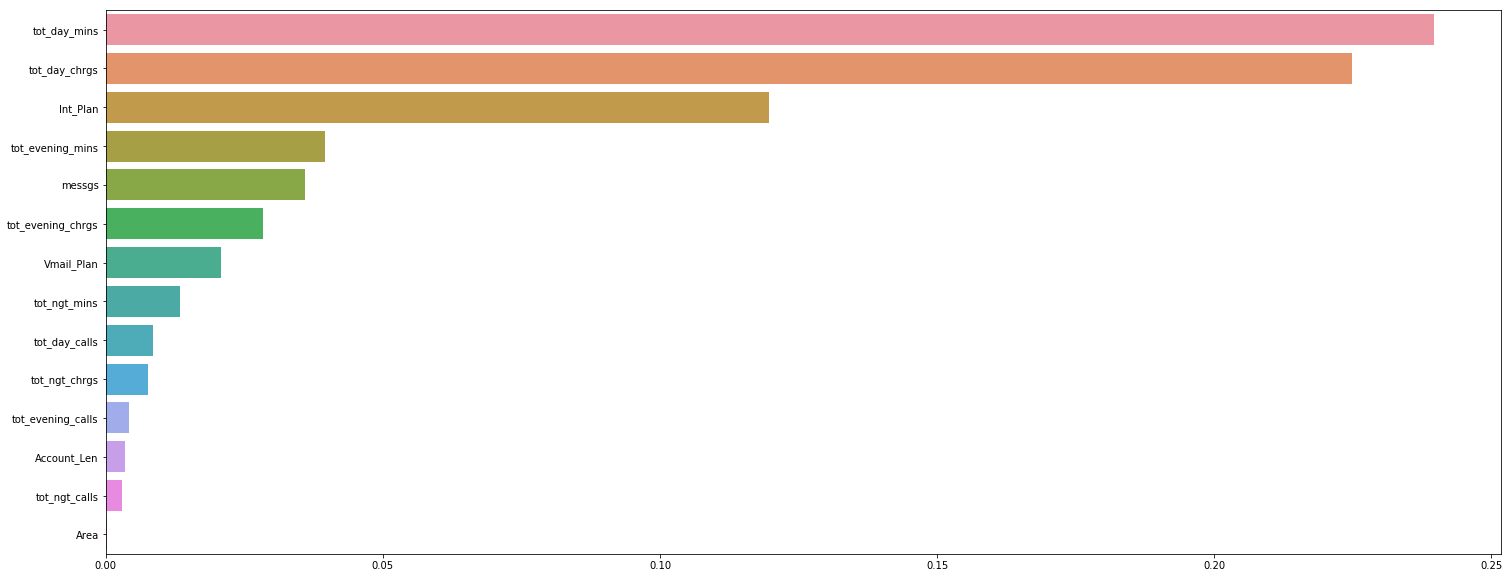

In [49]:
feature_importance = {X_train.columns[item] : rfc.feature_importances_[item] for item in range(0,14)}
list_order = sorted(feature_importance,key=feature_importance.get,reverse=True)

sns.barplot([feature_importance[item] for item in list_order],list_order)
plt.show()